In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
data = pd.read_csv("COVID-19BehaviorData_CAN2022.csv")
data.head()

/var/folders/gx/s5_4k7114v90fkvwrtg9tvmm0000gn/T/ipykernel_16784/3479889270.py:1: DtypeWarning: Columns (4,505,506,507,508,509,510,511) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("COVID-19BehaviorData_CAN2022.csv")


,RecordNo,endtime,qweek,i1_health,i2_health,i7a_health,i3_health,i4_health,i5_health_1,i5_health_2,...,vac_man_96,vac_man_99,q_other,had_covid,vac_boost_beyond,future_1,future_2,had_covid_2,long_covid,future_3
0,41589,06/01/2022 18:02,week 44,,0,,,,,,...,No,No,__NA__,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41731,03/01/2022 23:48,week 44,,1,,,,,,...,No,No,__NA__,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,41756,10/01/2022 04:53,week 44,,0,,,,,,...,Yes,No,"Oui bar , restaurent",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41846,01/01/2022 13:15,week 44,,5,,,,,,...,No,No,__NA__,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41847,01/01/2022 19:12,week 44,,150,,,,,,...,No,No,__NA__,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
data = data.replace(r'^\s*$', np.nan, regex=True)

# Finding columns where all values are NaN
empty_columns = data.columns[data.isna().all()]

print("Columns with all NaN values:", empty_columns)
data_c = data.dropna(axis=1, how='all')
data_c.shape

Columns with all NaN values: Index(['i1_health', 'i7a_health', 'i3_health', 'i4_health', 'i5_health_1',
       'i5_health_2', 'i5_health_3', 'i5_health_4', 'i5_health_5',
       'i5_health_99',
       ...
       'SC_1_99', 'SC_2', 'SC_3_1', 'SC_3_2', 'SC_3_3', 'SC_3_4', 'SC_3_5',
       'SC_3_6', 'SC_3_7', 'SC_3_99'],
      dtype='object', length=353)


(6430, 159)

In [98]:
data_cleaned = data.dropna(axis=1, how='all')
data_cleaned.shape

(6430, 159)

In [99]:
columns_to_drop = data_cleaned.columns[data_cleaned.isnull().mean() <= 0.30]

print(len(columns_to_drop))

# Display the columns that have more than 50% missing data
columns_to_drop

67


Index(['RecordNo', 'endtime', 'qweek', 'i9_health', 'i11_health',
       'i12_health_1', 'i12_health_2', 'i12_health_3', 'i12_health_4',
       'i12_health_5', 'i12_health_6', 'i12_health_7', 'i12_health_8',
       'i12_health_11', 'i12_health_12', 'i12_health_13', 'i12_health_14',
       'i12_health_15', 'i12_health_16', 'i14_health_other', 'weight',
       'gender', 'age', 'region', 'household_size', 'household_children',
       'employment_status', 'cantril_ladder', 'PHQ4_1', 'PHQ4_2', 'PHQ4_3',
       'PHQ4_4', 'WCRex2', 'WCRex1', 'i12_health_22', 'i12_health_23',
       'i12_health_25', 'r1_1', 'r1_2', 'i12_health_26', 'i12_health_27',
       'i12_health_28', 'i12_health_29', 'vac2_1', 'vac2_2', 'vac2_3', 'vac7',
       'r1_8', 'r1_9', 'vac2_7', 'vac', 'vac12_other', 'Vent_3', 'vac_boost_1',
       'vac12_booster_other', 'vac_man_1', 'vac_man_2', 'vac_man_3',
       'vac_man_4', 'vac_man_5', 'vac_man_6', 'vac_man_7', 'vac_man_96',
       'vac_man_99', 'q_other', 'future_1', 'futur

In [100]:
missing_values_per_column = columns_to_drop.isnull().sum()
print(missing_values_per_column)
df_filtered_final = data_cleaned.dropna(subset=['had_covid'])
df_filtered_final

0


,RecordNo,endtime,qweek,i2_health,i9_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,...,vac_man_96,vac_man_99,q_other,had_covid,vac_boost_beyond,future_1,future_2,had_covid_2,long_covid,future_3
1631,43573,24/01/2022 15:17,week 46,10,Yes,Very willing,Frequently,Sometimes,Sometimes,Always,...,No,Yes,__NA__,No,NaN,3 – About the same,3 – About the same,NaN,NaN,NaN
1632,43574,24/01/2022 16:00,week 46,3,Yes,Very willing,Always,Always,Always,Always,...,Yes,No,Itinérants,Yes,1 - Strongly agree,3 – About the same,3 – About the same,NaN,NaN,NaN
1633,43575,24/01/2022 16:09,week 46,0,No,Somewhat willing,Frequently,Always,Frequently,Sometimes,...,No,No,__NA__,No,NaN,3 – About the same,2,NaN,NaN,NaN
1634,43576,24/01/2022 16:10,week 46,12,Yes,Somewhat willing,Always,Frequently,Always,Always,...,No,Yes,__NA__,No,3,3 – About the same,3 – About the same,NaN,NaN,NaN
1635,43577,24/01/2022 16:20,week 46,0,Yes,Very willing,Always,Always,Always,Always,...,No,No,__NA__,No,1 - Strongly agree,3 – About the same,3 – About the same,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,44553,05/02/2022 20:49,week 46,1,Yes,Very willing,Always,Always,Always,Always,...,No,No,__NA__,Yes,NaN,4,4,NaN,NaN,NaN
2612,44554,06/02/2022 00:12,week 46,75,Yes,Somewhat willing,Always,Always,Frequently,Always,...,No,Yes,__NA__,No,2,1 – A lot less impact,1 – A lot less impact,NaN,NaN,NaN
2613,44555,06/02/2022 01:02,week 46,0,Yes,Very willing,Always,Always,Sometimes,Always,...,No,Yes,__NA__,No,NaN,1 – A lot less impact,1 – A lot less impact,NaN,NaN,NaN
2614,44556,06/02/2022 09:15,week 46,0,No,Somewhat unwilling,Rarely,Sometimes,Rarely,Not at all,...,No,Yes,__NA__,No,NaN,3 – About the same,2,NaN,NaN,NaN


In [101]:
columns_to_keep = ['RecordNo', 'endtime', 'qweek', 'i9_health', 'i11_health',
       'i12_health_1', 'i12_health_2', 'i12_health_3', 'i12_health_4',
       'i12_health_5', 'i12_health_6', 'i12_health_7', 'i12_health_8',
       'i12_health_11', 'i12_health_12', 'i12_health_13', 'i12_health_14',
       'i12_health_15', 'i12_health_16', 'i14_health_other', 'weight',
       'gender', 'age', 'region', 'household_size', 'household_children',
       'employment_status', 'cantril_ladder', 'PHQ4_1', 'PHQ4_2', 'PHQ4_3',
       'PHQ4_4', 'WCRex2', 'WCRex1', 'i12_health_22', 'i12_health_23',
       'i12_health_25', 'r1_1', 'r1_2', 'i12_health_26', 'i12_health_27',
       'i12_health_28', 'i12_health_29', 'vac2_1', 'vac2_2', 'vac2_3', 'vac7',
       'r1_8', 'r1_9', 'vac2_7', 'vac', 'vac12_other', 'Vent_3', 'vac_boost_1',
       'vac12_booster_other', 'vac_man_1', 'vac_man_2', 'vac_man_3',
       'vac_man_4', 'vac_man_5', 'vac_man_6', 'vac_man_7', 'vac_man_96',
       'vac_man_99', 'future_1', 'future_2']

df_filtered_final = df_filtered_final[columns_to_keep]

print(df_filtered_final)


      RecordNo           endtime    qweek i9_health          i11_health  \
1631     43573  24/01/2022 15:17  week 46       Yes        Very willing   
1632     43574  24/01/2022 16:00  week 46       Yes        Very willing   
1633     43575  24/01/2022 16:09  week 46        No    Somewhat willing   
1634     43576  24/01/2022 16:10  week 46       Yes    Somewhat willing   
1635     43577  24/01/2022 16:20  week 46       Yes        Very willing   
...        ...               ...      ...       ...                 ...   
2611     44553  05/02/2022 20:49  week 46       Yes        Very willing   
2612     44554  06/02/2022 00:12  week 46       Yes    Somewhat willing   
2613     44555  06/02/2022 01:02  week 46       Yes        Very willing   
2614     44556  06/02/2022 09:15  week 46        No  Somewhat unwilling   
2615     44557  06/02/2022 11:13  week 46       Yes        Very willing   

     i12_health_1 i12_health_2 i12_health_3 i12_health_4 i12_health_5  ...  \
1631   Frequently    

In [102]:
def find_columns_with_nulls(df):
    return df.columns[df.isnull().any()].tolist()

In [103]:
rows_with_nulls = find_columns_with_nulls(df_filtered_final)
print(rows_with_nulls)

['vac_boost_1']


In [104]:
def calculate_yes_no_ratio(df):
    ratio_dict = {}
    for col in df.columns:
        yes_count = (df[col] == 'Yes').sum()  
        no_count = (df[col] == 'No').sum()  
        total_count = yes_count + no_count
        yes_ratio = yes_count / total_count if total_count != 0 else 0
        no_ratio = no_count / total_count if total_count != 0 else 0
        ratio_dict[col] = {'yes_ratio': yes_ratio, 'no_ratio': no_ratio}
    return ratio_dict

In [105]:
ratios = calculate_yes_no_ratio(df_filtered_final)

In [106]:
filtered_ratios = {col: ratio for col, ratio in ratios.items() if not (ratio['yes_ratio'] == 0 and ratio['no_ratio'] == 0)}
for col, ratio in filtered_ratios.items():
    print(f"{col} - Yes ratio: {ratio['yes_ratio']:.2%}, No ratio: {ratio['no_ratio']:.2%}")

i9_health - Yes ratio: 82.28%, No ratio: 17.72%
vac_boost_1 - Yes ratio: 61.29%, No ratio: 38.71%
vac_man_1 - Yes ratio: 68.07%, No ratio: 31.93%
vac_man_2 - Yes ratio: 65.29%, No ratio: 34.71%
vac_man_3 - Yes ratio: 65.09%, No ratio: 34.91%
vac_man_4 - Yes ratio: 63.44%, No ratio: 36.56%
vac_man_5 - Yes ratio: 55.92%, No ratio: 44.08%
vac_man_6 - Yes ratio: 46.55%, No ratio: 53.45%
vac_man_7 - Yes ratio: 44.08%, No ratio: 55.92%
vac_man_96 - Yes ratio: 3.71%, No ratio: 96.29%
vac_man_99 - Yes ratio: 27.19%, No ratio: 72.81%


In [107]:
for col in filtered_ratios.keys():
    missing_indices = df_filtered_final[df_filtered_final[col].isnull()].index
    yes_ratio = filtered_ratios[col]['yes_ratio']
    no_ratio = filtered_ratios[col]['no_ratio']
    random_values = np.random.choice(['Yes', 'No'], size=len(missing_indices), p=[yes_ratio, no_ratio])
    df_filtered_final.loc[missing_indices, col] = random_values
print(df_filtered_final)

      RecordNo           endtime    qweek i9_health          i11_health  \
1631     43573  24/01/2022 15:17  week 46       Yes        Very willing   
1632     43574  24/01/2022 16:00  week 46       Yes        Very willing   
1633     43575  24/01/2022 16:09  week 46        No    Somewhat willing   
1634     43576  24/01/2022 16:10  week 46       Yes    Somewhat willing   
1635     43577  24/01/2022 16:20  week 46       Yes        Very willing   
...        ...               ...      ...       ...                 ...   
2611     44553  05/02/2022 20:49  week 46       Yes        Very willing   
2612     44554  06/02/2022 00:12  week 46       Yes    Somewhat willing   
2613     44555  06/02/2022 01:02  week 46       Yes        Very willing   
2614     44556  06/02/2022 09:15  week 46        No  Somewhat unwilling   
2615     44557  06/02/2022 11:13  week 46       Yes        Very willing   

     i12_health_1 i12_health_2 i12_health_3 i12_health_4 i12_health_5  ...  \
1631   Frequently    

In [108]:
missing_values_per_column = df_filtered_final.isnull().sum()
sum(missing_values_per_column !=0 )

0

In [109]:
'i12_health_23','i12_health_25', 'r1_2', 'i12_health_26', 'i12_health_27','i12_health_28', 'i12_health_29', 
'vac2_1', 'vac2_2','r1_8', 'vac', 'Vent_3', 'vac_boost_1','future_1', 'future_2'

('vac2_1',
 'vac2_2',
 'r1_8',
 'vac',
 'Vent_3',
 'vac_boost_1',
 'future_1',
 'future_2')

In [110]:
mapping_dict = {
    "Always": 1,
    "Frequently": 2,
    "Sometimes": 3,
    "Rarely": 4,
    "Not at all": 5
}

df_filtered_final['i12_health_23'] = df_filtered_final['i12_health_23'].replace(mapping_dict)
print(df_filtered_final['i12_health_23'])

1631    2
1632    1
1633    1
1634    1
1635    1
       ..
2611    1
2612    1
2613    1
2614    2
2615    1
Name: i12_health_23, Length: 971, dtype: int64


/var/folders/gx/s5_4k7114v90fkvwrtg9tvmm0000gn/T/ipykernel_16784/68165002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final['i12_health_23'] = df_filtered_final['i12_health_23'].replace(mapping_dict)


In [111]:
df_filtered_final['i12_health_25'] = df_filtered_final['i12_health_25'].replace(mapping_dict)
print(df_filtered_final['i12_health_25'])

1631    2
1632    1
1633    1
1634    1
1635    1
       ..
2611    1
2612    1
2613    1
2614    5
2615    1
Name: i12_health_25, Length: 971, dtype: int64


/var/folders/gx/s5_4k7114v90fkvwrtg9tvmm0000gn/T/ipykernel_16784/3081892446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final['i12_health_25'] = df_filtered_final['i12_health_25'].replace(mapping_dict)


In [112]:
df_filtered_final['i12_health_26'] = df_filtered_final['i12_health_26'].replace(mapping_dict)
print(df_filtered_final['i12_health_26'])

1631    4
1632    1
1633    3
1634    2
1635    1
       ..
2611    2
2612    4
2613    3
2614    4
2615    2
Name: i12_health_26, Length: 971, dtype: int64


/var/folders/gx/s5_4k7114v90fkvwrtg9tvmm0000gn/T/ipykernel_16784/3441569954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final['i12_health_26'] = df_filtered_final['i12_health_26'].replace(mapping_dict)


In [113]:
df_filtered_final['i12_health_27'] = df_filtered_final['i12_health_27'].replace(mapping_dict)
print(df_filtered_final['i12_health_27'])

1631    4
1632    4
1633    1
1634    3
1635    1
       ..
2611    1
2612    4
2613    5
2614    4
2615    2
Name: i12_health_27, Length: 971, dtype: int64


/var/folders/gx/s5_4k7114v90fkvwrtg9tvmm0000gn/T/ipykernel_16784/104873175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final['i12_health_27'] = df_filtered_final['i12_health_27'].replace(mapping_dict)


In [114]:
df_filtered_final['i12_health_28'] = df_filtered_final['i12_health_28'].replace(mapping_dict)
print(df_filtered_final['i12_health_28'])

1631    5
1632    1
1633    4
1634    1
1635    1
       ..
2611    1
2612    5
2613    1
2614    4
2615    1
Name: i12_health_28, Length: 971, dtype: int64


/var/folders/gx/s5_4k7114v90fkvwrtg9tvmm0000gn/T/ipykernel_16784/396420628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final['i12_health_28'] = df_filtered_final['i12_health_28'].replace(mapping_dict)


In [115]:
df_filtered_final['i12_health_29'] = df_filtered_final['i12_health_29'].replace(mapping_dict)
print(df_filtered_final['i12_health_29'])

1631    4
1632    4
1633    2
1634    5
1635    1
       ..
2611    1
2612    5
2613    5
2614    1
2615    1
Name: i12_health_29, Length: 971, dtype: int64


/var/folders/gx/s5_4k7114v90fkvwrtg9tvmm0000gn/T/ipykernel_16784/3021764506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final['i12_health_29'] = df_filtered_final['i12_health_29'].replace(mapping_dict)


In [116]:
mapping_dict_r = {
    '7 - Agree': 7,
    '1 – Disagree': 1,
    '6':6,
    '4':4,
    '3':3,
    '2':2,
    '5':5
}

df_filtered_final['r1_2'] = df_filtered_final['r1_2'].replace(mapping_dict_r)
print(df_filtered_final['r1_2'])

1631    4
1632    4
1633    6
1634    6
1635    5
       ..
2611    4
2612    7
2613    7
2614    4
2615    6
Name: r1_2, Length: 971, dtype: int64


/var/folders/gx/s5_4k7114v90fkvwrtg9tvmm0000gn/T/ipykernel_16784/1959689557.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final['r1_2'] = df_filtered_final['r1_2'].replace(mapping_dict_r)


In [117]:
mapping_dict_vac = {
    '5 – Strongly disagree': 5,
    '1 - Strongly agree': 1,
    '4':4,
    '3':3,
    '2':2
}

df_filtered_final['vac2_1'] = df_filtered_final['vac2_1'].replace(mapping_dict_vac)
print(df_filtered_final['vac2_1'])

1631    5
1632    3
1633    4
1634    2
1635    5
       ..
2611    5
2612    5
2613    5
2614    4
2615    4
Name: vac2_1, Length: 971, dtype: int64


/var/folders/gx/s5_4k7114v90fkvwrtg9tvmm0000gn/T/ipykernel_16784/3381181622.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final['vac2_1'] = df_filtered_final['vac2_1'].replace(mapping_dict_vac)


In [118]:
mapping_dict_vac = {
    '5 – Strongly disagree': 5,
    '1 - Strongly agree': 1,
    '4':4,
    '3':3,
    '2':2
}

df_filtered_final['vac2_2'] = df_filtered_final['vac2_2'].replace(mapping_dict_vac)
print(df_filtered_final['vac2_2'])

1631    2
1632    1
1633    4
1634    3
1635    5
       ..
2611    3
2612    5
2613    5
2614    2
2615    2
Name: vac2_2, Length: 971, dtype: int64


/var/folders/gx/s5_4k7114v90fkvwrtg9tvmm0000gn/T/ipykernel_16784/408921047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final['vac2_2'] = df_filtered_final['vac2_2'].replace(mapping_dict_vac)


In [119]:
df_filtered_final['r1_8'] = df_filtered_final['r1_8'].replace(mapping_dict_r)
print(df_filtered_final['r1_8'])

1631    2
1632    7
1633    5
1634    6
1635    7
       ..
2611    7
2612    7
2613    4
2614    2
2615    7
Name: r1_8, Length: 971, dtype: int64


/var/folders/gx/s5_4k7114v90fkvwrtg9tvmm0000gn/T/ipykernel_16784/813839051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final['r1_8'] = df_filtered_final['r1_8'].replace(mapping_dict_r)


In [120]:
mapping_dict_vacc = {
    'No, neither':0,
    'Yes, two doses':2, 
    'Yes, one dose':1
}

df_filtered_final['vac'] = df_filtered_final['vac'].replace(mapping_dict_vacc)
print(df_filtered_final['vac'])

1631    0
1632    2
1633    2
1634    2
1635    2
       ..
2611    2
2612    2
2613    2
2614    1
2615    2
Name: vac, Length: 971, dtype: int64


/var/folders/gx/s5_4k7114v90fkvwrtg9tvmm0000gn/T/ipykernel_16784/967711251.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final['vac'] = df_filtered_final['vac'].replace(mapping_dict_vacc)


In [121]:
df_filtered_final['Vent_3'] = df_filtered_final['Vent_3'].replace(mapping_dict)
print(df_filtered_final['Vent_3'])

1631    4
1632    2
1633    4
1634    3
1635    5
       ..
2611    2
2612    5
2613    3
2614    4
2615    3
Name: Vent_3, Length: 971, dtype: int64


/var/folders/gx/s5_4k7114v90fkvwrtg9tvmm0000gn/T/ipykernel_16784/2040746893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final['Vent_3'] = df_filtered_final['Vent_3'].replace(mapping_dict)


In [122]:
mapping_dict_vacboost = {
    'No':0,
    'Yes':1
}
df_filtered_final['vac_boost_1'] = df_filtered_final['vac_boost_1'].replace(mapping_dict_vacboost)
print(df_filtered_final['vac_boost_1'])

1631    1
1632    1
1633    0
1634    1
1635    1
       ..
2611    0
2612    1
2613    0
2614    0
2615    1
Name: vac_boost_1, Length: 971, dtype: int64


/var/folders/gx/s5_4k7114v90fkvwrtg9tvmm0000gn/T/ipykernel_16784/3473462406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final['vac_boost_1'] = df_filtered_final['vac_boost_1'].replace(mapping_dict_vacboost)


In [123]:
mapping_dict_future = {
    '3 – About the same':3,
    '1 – A lot less impact':1,
    '5 - A lot more of an impact':5,
    '2':2,
    '4':4
}
df_filtered_final['future_1'] = df_filtered_final['future_1'].replace(mapping_dict_future)
print(df_filtered_final['future_1'])

1631    3
1632    3
1633    3
1634    3
1635    3
       ..
2611    4
2612    1
2613    1
2614    3
2615    3
Name: future_1, Length: 971, dtype: int64


/var/folders/gx/s5_4k7114v90fkvwrtg9tvmm0000gn/T/ipykernel_16784/87148762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final['future_1'] = df_filtered_final['future_1'].replace(mapping_dict_future)


In [124]:
df_filtered_final['future_2'] = df_filtered_final['future_2'].replace(mapping_dict_future)
print(df_filtered_final['future_2'])

1631    3
1632    3
1633    2
1634    3
1635    3
       ..
2611    4
2612    1
2613    1
2614    2
2615    1
Name: future_2, Length: 971, dtype: int64


/var/folders/gx/s5_4k7114v90fkvwrtg9tvmm0000gn/T/ipykernel_16784/2809361227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final['future_2'] = df_filtered_final['future_2'].replace(mapping_dict_future)


In [125]:
mapping_dict_region = {
    '7': 7,
    '1': 1,
    '6':6,
    '4':4,
    '3':3,
    '2':2,
    '5':5
}

df_filtered_final['region'] = df_filtered_final['region'].replace(mapping_dict_region)
print(df_filtered_final['region'])

1631                                   Ontario
1632                           Quebec / Québec
1633                           Quebec / Québec
1634    British Columbia / Colombie Britanique
1635                           Quebec / Québec
                         ...                  
2611                                   Ontario
2612                                   Ontario
2613                                   Ontario
2614                                   Ontario
2615                                   Ontario
Name: region, Length: 971, dtype: object


/var/folders/gx/s5_4k7114v90fkvwrtg9tvmm0000gn/T/ipykernel_16784/396689668.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final['region'] = df_filtered_final['region'].replace(mapping_dict_region)


In [126]:
df_filtered_final['future_2'].unique()

array([3, 2, 1, 5, 4])

In [127]:
value_counts = df_filtered_final['i9_health'].value_counts()
value_counts

Yes         743
No          160
Not sure     68
Name: i9_health, dtype: int64

In [128]:
value_counts1 = df_filtered_final['i11_health'].value_counts()
value_counts1

Very willing                     662
Somewhat willing                 187
Neither willing nor unwilling     57
Very unwilling                    26
Not sure                          21
Somewhat unwilling                18
Name: i11_health, dtype: int64

In [129]:
mapping_dict_household = {
    '7': 7,
    '1': 1,
    '6':6,
    '4':4,
    '3':3,
    '2':2,
    '5':5
}
df_filtered_final['household_size'] = df_filtered_final['household_size'].replace(mapping_dict_household)
print(df_filtered_final['household_size'])

1631    2
1632    2
1633    6
1634    2
1635    2
       ..
2611    3
2612    4
2613    2
2614    3
2615    3
Name: household_size, Length: 971, dtype: object


/var/folders/gx/s5_4k7114v90fkvwrtg9tvmm0000gn/T/ipykernel_16784/1163348248.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final['household_size'] = df_filtered_final['household_size'].replace(mapping_dict_household)


In [130]:
df_filtered_final = df_filtered_final.drop(columns=['household_children', 'cantril_ladder','region'])

#------------------------------------------
value_mapping = {
    'Not at all': 1,
    'Several days': 2,
    'More than half the days': 3,
    'Nearly every day': 4,
    'Prefer not to say': 99
}

columns_to_replace = ['PHQ4_1', 'PHQ4_2', 'PHQ4_3', 'PHQ4_4']
for column in columns_to_replace:
    df_filtered_final[column] = df_filtered_final[column].replace(value_mapping)

for column in columns_to_replace:
    # Calculate the mean of the column excluding the value 99
    mean_value = df_filtered_final[df_filtered_final[column] != 99][column].mean()
    # Replace the value 99 with the calculated mean
    df_filtered_final[column] = df_filtered_final[column].replace(99, mean_value)

# Sum the values of the four columns 'PHQ4_1', 'PHQ4_2', 'PHQ4_3', 'PHQ4_4' and create a new column named 'PHQ4'
df_filtered_final['PHQ4'] = df_filtered_final[['PHQ4_1', 'PHQ4_2', 'PHQ4_3', 'PHQ4_4']].mean(axis=1)

print(df_filtered_final[['PHQ4_1', 'PHQ4_2', 'PHQ4_3', 'PHQ4_4', 'PHQ4']].head())
#----------------------------------

gender_mapping = {
    'Male' : 1,
    'Female' : 2
}
df_filtered_final['gender'] = df_filtered_final['gender'].replace(gender_mapping)

#--------------------------------------
employment_status_mapping = {
    'Full time employment': 1,
    'Part time employment': 2,
    'Full time student': 3,
    'Retired': 4,
    'Unemployed': 5,
    'Not working': 6,
    'Other': 7
}

df_filtered_final['employment_status'] = df_filtered_final['employment_status'].replace(employment_status_mapping)
#-----------------------------------------------

wcrex2_mapping = {
    'A lot of confidence': 1,
    'A fair amount of confidence': 2,
    'Not very much confidence': 3,
    'No confidence at all': 4,
    "Don't know": 5
}

df_filtered_final['WCRex2'] = df_filtered_final['WCRex2'].replace(wcrex2_mapping)

#----------------------------

wcrex1_mapping = {
    'Very well': 1,
    'Somewhat well': 2,
    'Somewhat badly': 3,
    'Very badly': 4,
    "Don't know": 5
}

df_filtered_final['WCRex1'] = df_filtered_final['WCRex1'].replace(wcrex1_mapping)

#----------------------------

i12_health_22_mapping = {
    'Always': 1,
    'Frequently': 2,
    'Sometimes': 3,
    'Rarely': 4,
    'Not at all': 5
}

df_filtered_final['i12_health_22'] = df_filtered_final['i12_health_22'].replace(i12_health_22_mapping)

df_filtered_final = df_filtered_final.drop(columns=['PHQ4_1', 'PHQ4_2', 'PHQ4_3', 'PHQ4_4'])

      PHQ4_1  PHQ4_2  PHQ4_3  PHQ4_4  PHQ4
1631     2.0     2.0     2.0     2.0   2.0
1632     2.0     1.0     2.0     1.0   1.5
1633     3.0     2.0     2.0     1.0   2.0
1634     1.0     1.0     1.0     1.0   1.0
1635     1.0     1.0     1.0     1.0   1.0


In [131]:
'i9_health', 'i11_health',
'i12_health_1', 'i12_health_2', 'i12_health_3', 'i12_health_4',
'i12_health_5', 'i12_health_6', 'i12_health_7', 'i12_health_8',
'i12_health_11', 'i12_health_12', 'i12_health_13', 'i12_health_14',
'i12_health_15', 'i12_health_16'

('i12_health_15', 'i12_health_16')

In [132]:
mapping_dict_i9health = {
    'No':0,
    'Yes':1,
    'Not sure': None
}
df_filtered_final['i9_health'] = df_filtered_final['i9_health'].replace(mapping_dict_i9health)
df_filtered_final = df_filtered_final.dropna(subset=['i9_health'])
print(df_filtered_final['i9_health'])

1631    1.0
1632    1.0
1633    0.0
1634    1.0
1635    1.0
       ... 
2611    1.0
2612    1.0
2613    1.0
2614    0.0
2615    1.0
Name: i9_health, Length: 903, dtype: float64


In [133]:
mapping_dict_i11health = {
    'Very willing':0,
    'Somewhat willing':1,
    'Neither willing nor unwilling':2,
    'Somewhat unwilling':3,
    'Very unwilling':4,
    'Not sure': None
    #update2
}
df_filtered_final['i11_health'] = df_filtered_final['i11_health'].replace(mapping_dict_i11health)
df_filtered_final = df_filtered_final.dropna(subset=['i11_health'])
print(df_filtered_final['i11_health'])

1631    0.0
1632    0.0
1633    1.0
1634    1.0
1635    0.0
       ... 
2611    0.0
2612    1.0
2613    0.0
2614    3.0
2615    0.0
Name: i11_health, Length: 892, dtype: float64


In [134]:
for i in [1,2,3,4,5,6,7,8,11,12,13,14,15,16]:
    name = 'i12_health_' + str(i)
    df_filtered_final[name] = df_filtered_final[name].replace(mapping_dict)
print(df_filtered_final['i12_health_16'])

1631    5
1632    2
1633    4
1634    4
1635    4
       ..
2611    2
2612    4
2613    5
2614    4
2615    3
Name: i12_health_16, Length: 892, dtype: int64


In [135]:
df_filtered_final.describe()

,RecordNo,i9_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,...,i12_health_29,vac2_1,vac2_2,r1_8,vac,Vent_3,vac_boost_1,future_1,future_2,PHQ4
count,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,...,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000
mean,44064.890135,0.827354,0.433857,1.347534,1.316143,1.633408,1.170404,1.386771,2.520179,2.117713,...,1.913677,2.983184,3.031390,5.169283,1.792601,2.178251,0.625561,3.078475,2.784753,1.978818
std,283.823294,0.378153,0.858768,0.934598,0.645147,1.011230,0.544433,0.914752,1.314956,1.489447,...,1.321646,1.295225,1.385803,2.011035,0.575043,1.245715,0.484249,0.885414,1.007643,0.878236
min,43573.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,43821.750000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.000000,3.000000,2.000000,1.250000
50%,44065.500000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,3.000000,3.000000,6.000000,2.000000,2.000000,1.000000,3.000000,3.000000,1.985004
75%,44306.250000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,...,2.000000,4.000000,4.000000,7.000000,2.000000,3.000000,1.000000,3.000000,3.000000,2.500000
max,44557.000000,1.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,7.000000,2.000000,5.000000,1.000000,5.000000,5.000000,4.000000


In [136]:
df_merged = df_filtered_final.merge(data_cleaned[['RecordNo', 'had_covid']], on='RecordNo', how='left')

columns_to_extract = [
    'i12_health_23', 'i12_health_25', 'r1_2', 'i12_health_26', 'i12_health_27', 'i12_health_28', 'i12_health_29', 
    'vac2_1', 'vac2_2', 'r1_8', 'vac', 'Vent_3', 'vac_boost_1', 'future_1', 'future_2',
    'i9_health', 'i11_health',
    'i12_health_1', 'i12_health_2', 'i12_health_3', 'i12_health_4', 'i12_health_5', 'i12_health_6', 
    'i12_health_7', 'i12_health_8', 'i12_health_11', 'i12_health_12', 'i12_health_13', 
    'i12_health_14', 'i12_health_15', 'i12_health_16',
    'weight', 'gender', 'age', 'household_size', 'employment_status', 'PHQ4', 'WCRex2', 'WCRex1', 'i12_health_22',
    'had_covid'
]

df_merged_final = df_merged[columns_to_extract]


In [137]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892 entries, 0 to 891
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   i12_health_23      892 non-null    int64  
 1   i12_health_25      892 non-null    int64  
 2   r1_2               892 non-null    int64  
 3   i12_health_26      892 non-null    int64  
 4   i12_health_27      892 non-null    int64  
 5   i12_health_28      892 non-null    int64  
 6   i12_health_29      892 non-null    int64  
 7   vac2_1             892 non-null    int64  
 8   vac2_2             892 non-null    int64  
 9   r1_8               892 non-null    int64  
 10  vac                892 non-null    int64  
 11  Vent_3             892 non-null    int64  
 12  vac_boost_1        892 non-null    int64  
 13  future_1           892 non-null    int64  
 14  future_2           892 non-null    int64  
 15  i9_health          892 non-null    float64
 16  i11_health         892 non

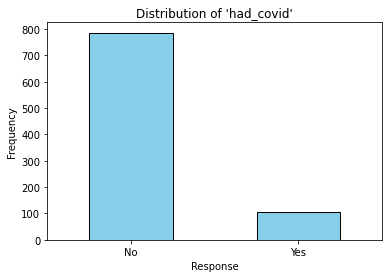

In [138]:
# Function to plot the distribution of the 'had_covid_label' column
def plot_distribution(df, col_name):
    if col_name not in df.columns:
        raise ValueError(f"Column '{col_name}' not found in the DataFrame.")
    
    df[col_name].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Distribution of '{col_name}'")
    plt.xlabel('Response')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.show()

# Plot the distribution of 'had_covid_label' column
plot_distribution(df_merged_final, "had_covid")

In [ ]:
df_merged_final['had_covid'] = df_merged_final['had_covid'].astype('category')
df_merged_final['r1_2'] = df_merged_final['r1_2'].astype('category')
cross_tab = pd.crosstab(df_merged_final['had_covid'], df_merged_final['r1_2'], margins=True)
print(cross_tab)
plt.figure(figsize=(10, 6))
sns.countplot(x='r1_2', hue='had_covid', data=df_merged_final)
plt.title('Clustered Bar Chart: had_covid vs r1_2')
plt.xlabel('r1_2')
plt.ylabel('Count')
plt.show()